# Euclid30K 数据集图像展示

这个notebook用于展示Euclid30K数据集中的图像数据。Euclid30K是一个几何问题数据集，包含约30K个平面和立体几何问题，用于提升视觉语言模型的空间智能能力。

In [1]:
import pandas as pd
import os
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# 设置数据集路径
DATA_PATH = "/Users/jia/datasets/Euclid30K"

# 加载数据集
train_file = os.path.join(DATA_PATH, "Euclid30K_train.parquet")
val_file = os.path.join(DATA_PATH, "Euclid30K_val.parquet")

print("正在加载数据集...")
train_df = pd.read_parquet(train_file)
val_df = pd.read_parquet(val_file)

print(f"训练集形状: {train_df.shape}")
print(f"验证集形状: {val_df.shape}")

正在加载数据集...
训练集形状: (29195, 3)
验证集形状: (500, 3)


In [2]:
# 显示数据集的列信息
print("数据集列名:")
for i, col in enumerate(train_df.columns):
    print(f"  {i+1}. {col}")

数据集列名:
  1. problem
  2. images
  3. answer


In [3]:
# 检查图像数据
print("检查训练集中的图像数据类型:")
print(f"images列的数据类型: {train_df['images'].dtype}")
print(f"images列的第一个样本类型: {type(train_df['images'].iloc[0])}")

if 'images' in train_df.columns:
    sample_image = train_df['images'].iloc[0]
    print(f"图像数据的形状: {sample_image.shape if hasattr(sample_image, 'shape') else 'N/A'}")

检查训练集中的图像数据类型:
images列的数据类型: object
images列的第一个样本类型: <class 'numpy.ndarray'>
图像数据的形状: (1,)


In [4]:
def try_display_image(image_data, title="Image"):
    """尝试显示图像数据"""
    try:
        if isinstance(image_data, np.ndarray) and image_data.size > 0:
            # 处理numpy数组
            first_element = image_data[0]
            if isinstance(first_element, dict) and 'bytes' in first_element:
                # 从字节数据创建图像
                image_bytes = first_element['bytes']
                if isinstance(image_bytes, str):
                    # 如果是base64编码的字符串
                    image_data_decoded = base64.b64decode(image_bytes)
                else:
                    image_data_decoded = image_bytes
                
                # 创建图像
                image = Image.open(io.BytesIO(image_data_decoded))
                plt.figure(figsize=(8, 8))
                plt.imshow(image)
                plt.title(title)
                plt.axis('off')
                plt.show()
                return True
        elif isinstance(image_data, list) and len(image_data) > 0:
            # 处理列表
            first_element = image_data[0]
            if isinstance(first_element, dict) and 'bytes' in first_element:
                # 从字节数据创建图像
                image_bytes = first_element['bytes']
                if isinstance(image_bytes, str):
                    # 如果是base64编码的字符串
                    image_data_decoded = base64.b64decode(image_bytes)
                else:
                    image_data_decoded = image_bytes
                
                # 创建图像
                image = Image.open(io.BytesIO(image_data_decoded))
                plt.figure(figsize=(8, 8))
                plt.imshow(image)
                plt.title(title)
                plt.axis('off')
                plt.show()
                return True
        return False
    except Exception as e:
        print(f"显示图像时出错: {e}")
        return False

训练集图像样本:

样本 1:


/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412

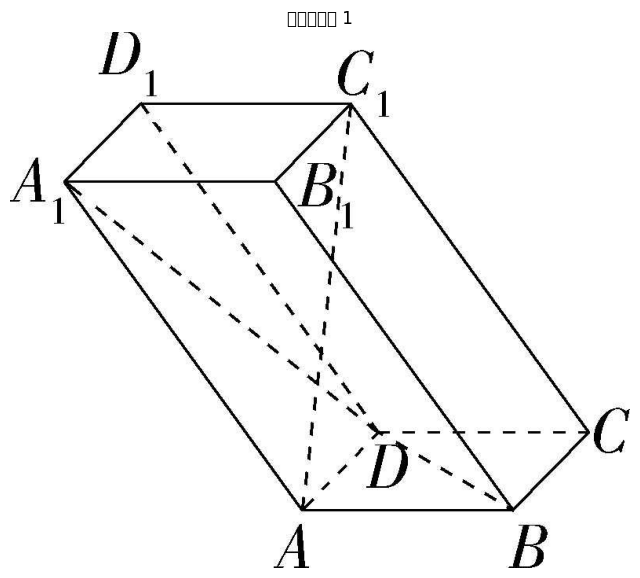


样本 2:


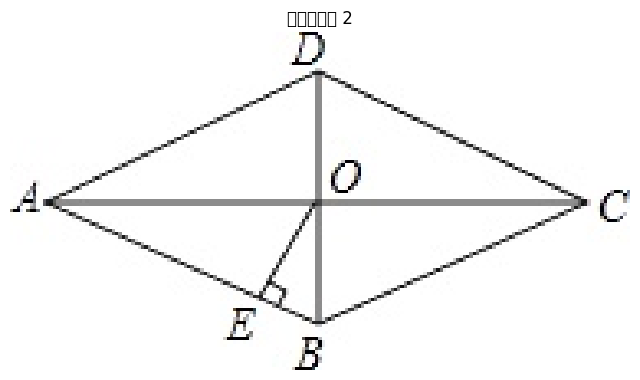


样本 3:


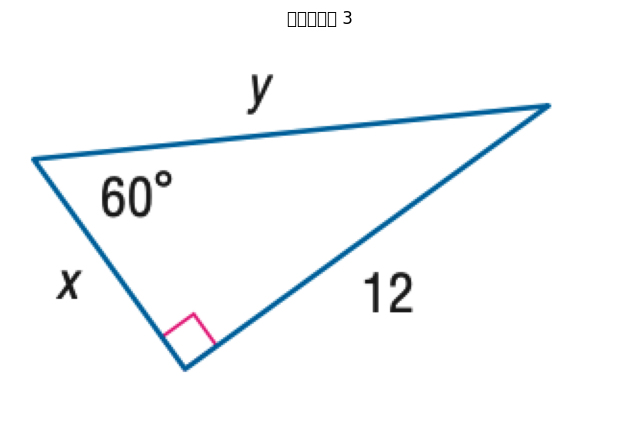

In [5]:
# 显示训练集中的图像样本
print("训练集图像样本:")
for i in range(min(3, len(train_df))):
    print(f"\n样本 {i+1}:")
    image_data = train_df.iloc[i]['images']
    if not try_display_image(image_data, f"训练集样本 {i+1}"):
        print("  无法显示图像")

验证集图像样本:

样本 1:


/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


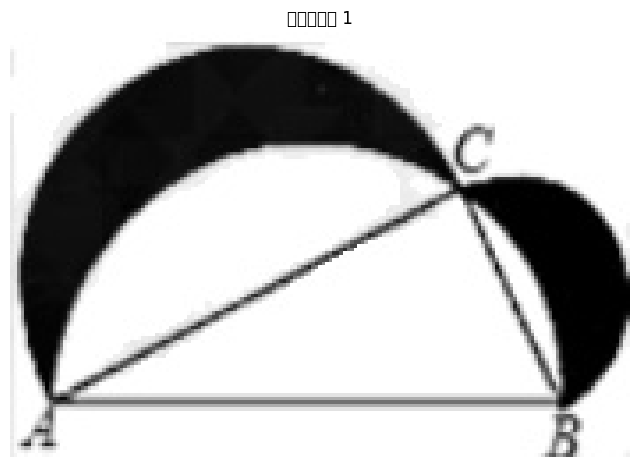


样本 2:


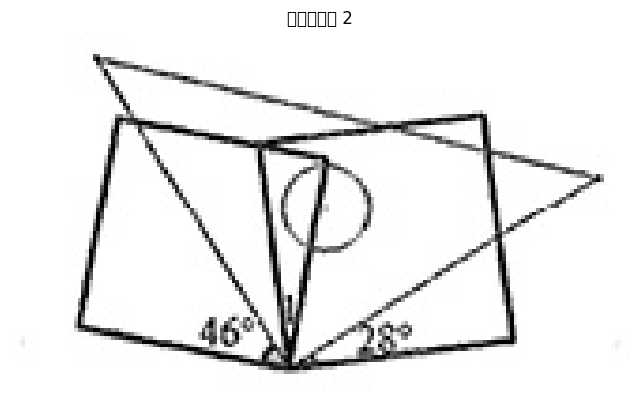


样本 3:


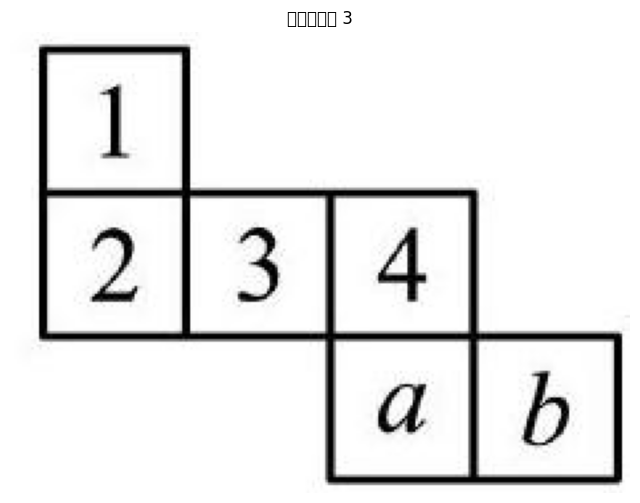

In [6]:
# 显示验证集中的图像样本
print("验证集图像样本:")
for i in range(min(3, len(val_df))):
    print(f"\n样本 {i+1}:")
    image_data = val_df.iloc[i]['images']
    if not try_display_image(image_data, f"验证集样本 {i+1}"):
        print("  无法显示图像")

In [7]:
# 显示图像数据的统计信息
print("图像数据统计信息:")
if 'images' in train_df.columns:
    # 检查训练集中有多少样本包含图像
    train_images_count = train_df['images'].notna().sum()
    print(f"训练集中包含图像的样本数: {train_images_count}/{len(train_df)} ({train_images_count/len(train_df)*100:.2f}%)")
    
if 'images' in val_df.columns:
    # 检查验证集中有多少样本包含图像
    val_images_count = val_df['images'].notna().sum()
    print(f"验证集中包含图像的样本数: {val_images_count}/{len(val_df)} ({val_images_count/len(val_df)*100:.2f}%)")

图像数据统计信息:
训练集中包含图像的样本数: 29195/29195 (100.00%)
验证集中包含图像的样本数: 500/500 (100.00%)


In [8]:
# 显示完整的样本数据（包括图像之外的其他字段）
print("训练集完整样本数据:")
for i in range(min(2, len(train_df))):
    print(f"\n样本 {i+1}:")
    for col in train_df.columns:
        if col != 'images':  # 图像单独处理
            value = train_df.iloc[i][col]
            # 对于较长的内容，只显示前200个字符
            if isinstance(value, str) and len(value) > 200:
                value = value[:200] + "..."
            print(f"  {col}: {value}")
    print()

训练集完整样本数据:

样本 1:
  problem: $如图，已知平行六面体ABCD-A_{1}B_{1}C_{1}D_{1}中，底面ABCD是边长为1的正方形，AA_{1}=2，\angle A_{1}AB=\angle A_{1}AD=120^\circ .$<image>
$(2)求异面直线AC_{1}与A_{1}D所成角的余弦值；$
  answer: $\frac{\frac{1}{2}+\frac{13}{2}}{\sqrt{5}\cdot \sqrt{5}}=\frac{7}{10}$


样本 2:
  problem: <image>As shown in the figure, in rhombus $ABCD$, diagonals $AC$ and $BD$ intersect at point $O$, and $OE \perp AB$ with the foot of the perpendicular at $E$. If $\angle ADC = 128{}^\circ$, then the m...
  answer: 64°



In [9]:
print("验证集完整样本数据:")
for i in range(min(2, len(val_df))):
    print(f"\n样本 {i+1}:")
    for col in val_df.columns:
        if col != 'images':  # 图像单独处理
            value = val_df.iloc[i][col]
            # 对于较长的内容，只显示前200个字符
            if isinstance(value, str) and len(value) > 200:
                value = value[:200] + "..."
            print(f"  {col}: {value}")
    print()

验证集完整样本数据:

样本 1:
  problem: <image>As shown in the figure, in the right triangle ABC, ∠C=90°, AB=5, AC=4. Semicircles are drawn with the three sides of the right triangle ABC as diameters. The area of the shaded region is.
  answer: 6


样本 2:
  problem: <image>Two squares are placed with one right-angle vertex of a right-angled triangle overlapping, as shown in the figure, then the measure of $\angle 1$ is.
  answer: 16

